# Introduction to visualizing (scientific) data with matplotlib


"Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.", see https://matplotlib.org/

## Environment setup and modules

For this tutorial we will use an interactive environment that can be used within any modern web browser.
The main reason is that this is a very flexible approach that is, for example, often used to process and analyze data remotely in data centers (think about Terabytes of data that you cannot store or process on your laptop).

In order to use this interactive environment we need to load a backend.
Here, we chose the "inline" backend, which will show all plots as image files embedded in this browser window and works in practically any environment.
There also exist backends that use a separate graphical user interface (GUI) linked to your operating system's desktop, but they are less usable when working remotely.

In [1]:
# load matplotlib's inline backend via a 
%matplotlib inline

Now we import the modules that we'll use throughout this tutorial.
Remember, that it's also best practice to import _all_ module used throughout a python script/notebook 
at the top of the script/notebook so that the namespace remains clean.

You should already be familiar with the `numpy` module from the previous tutorial.
If you are unsure about certain `np...` commands or usage, have a look at the previous tutorial,
use the help (remember that a "?" shows the inline help, e.g., `np.array?`), or ask an instructor.

In addition to numpy, we also import `pyplot` from `matplotlib`, which is the `matplotlib` "state-machine"
and responsible for creating plots at the highest level of the hierarchy 
(e.g., creating "figures") - more details in the following.

Finally, we load the `datetime` module, which allows us to easily convert time data in the dataset we use 
throughout the tutorial.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Our dataset

We will use a dataset of Uber pickups in April 2014 in a certain city.
Each line of the dataset contains a pickup entry consisting of the
- the time of the pickup in a raw format (`POSIXtimestamp`, which is the amount of seconds since 01/01/1970),
- the longitude in degrees (decimal format), and
- the latitude in degrees (decimal format).


In [6]:
# loading data
!curl "http://localhost:8889/edit/Python%20Tutorial/uber-refmt-data-apr14.csv" > uber-refmt-data-apr14.csv
data = np.genfromtxt("uber-refmt-data-apr14.csv",names=True,delimiter=',')
data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
<ipython-input-6-06a3e4b04dd3>:3: UserWarning: genfromtxt: Empty input file: "uber-refmt-data-apr14.csv"
  data = np.genfromtxt("uber-refmt-data-apr14.csv",names=True,delimiter=',')


IndexError: list index out of range

`data` is now a named array, i.e., you can access the entries (here columns) via their names

In [0]:
data['POSIXtimestamp'][0]

1396325460.0

### Let's get spoiled - our first plot

In order to get a better feeling for the dataset and what `matplotlib` can do execute the next cell!
You'll see a "heatmap" of the total number of pickups that took place plotted within a certain area.

Based on the map, can you guess which city this is and what some of the distinct bright and dark features are?

Text(0, 0.5, 'Latitude [degrees]')

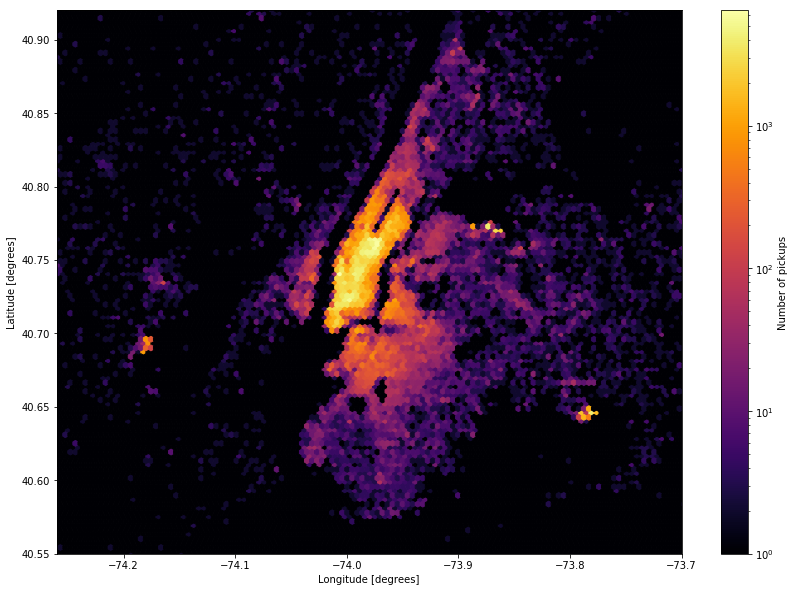

In [0]:
fig, p  = plt.subplots(1,1,figsize=(14,10))

im = p.hexbin(data['Lon'], data['Lat'],gridsize=600,bins='log',cmap='inferno')
cb = fig.colorbar(im, ax=p)
cb.set_label("Number of pickups")
p.set_xlim(-74.26,-73.70)
p.set_ylim(40.55, 40.92)
p.set_xlabel("Longitude [degrees]")
p.set_ylabel("Latitude [degrees]")

Several conceptually important things happened here:

With 
`fig, p  = plt.subplots(1,1,figsize=(14,10))`
we created a figure object `fig`  (with real size of 14 by 10 inches) and an "axis" object `p`.
Check out the syntax of `plt.subplots` for more info on the parameters.

In [7]:
plt.subplots?

In `matplotlib` a figure can hold mutiple axes and all plots (whether line, histogram, heatmap, ...) will 
always be drawn on an axis.

Therefore we plot the heatmap to the axis `p` with `im = p.hexbin(data['Lon'], data['Lat'],gridsize=600,bins='log',cmap='inferno')`
We saved the resulting image in `im` as we want to use that information to plot a colorbar in the next line.
Again, check out the documentation of `hexbin` to understand the arguments we used.

In [0]:
p.hexbin?

To add a colorbar, we used `cb = fig.colorbar(im, ax=p)`.

As stated before, a figure can hold mutiple axes.
The colorbar is drawn on a axis object itself, which is automatically created.
Given that the overall figure size does not change the required space for the colorbar is used from the existing axis via the `ax=p` argument.

The information for the coloring iteself is extracted form the image object `im` that has been plotted before.

Finally, we modifed the plots in two ways.

First, we added labels to both the heatmap axis `p` and to the colorbar `cb` via
- `p.set_xlabel("Longitude [degrees]")`
- `p.set_ylabel("Latitude [degrees]")`
- `cb.set_label("Number of pickups")`

Second, we restricted the area of the data shown by setting limits (i.e., a lower and upper bound) for the axes via
- `p.set_xlim(-74.26,-73.70)`
- `p.set_ylim(40.55, 40.92)`


Generally, all figures in `matplotlib` share a common anatomy.

Make yourself familar with the following overview from https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

![title](https://matplotlib.org/_images/anatomy.png)

We'll cover additional details shown, such as legends and ticks later in this tutorial, but first it's your turn now to modify the plot above!

Try to plot 
- the entire dataset (i.e., without limits),
- use a linear heatmap (i.e., the number of pickups is not shown on a logarithmic scale)
- and add a meaning full title to the plot (both `fig.suptitle()` and `ax.set_title()` are available. Can you think of a scenario where you'd use one over the other?

Text(0.5, 0.98, 'Uber pickups in April 2014 in New York')

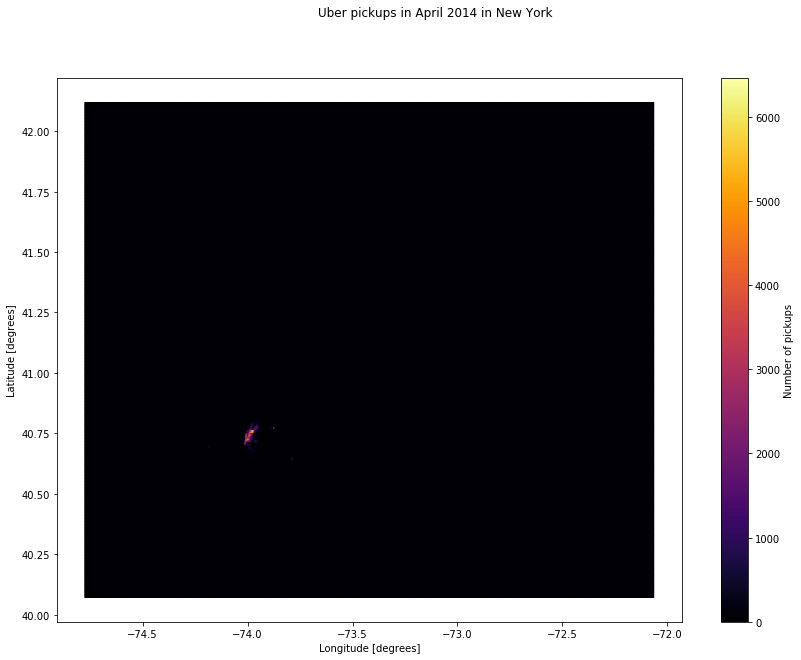

In [0]:
### ANSWER
fig, p  = plt.subplots(1,1,figsize=(14,10))

im = p.hexbin(data['Lon'], data['Lat'],gridsize=600,cmap='inferno')
cb = fig.colorbar(im, ax=p)
cb.set_label("Number of pickups")
p.set_xlabel("Longitude [degrees]")
p.set_ylabel("Latitude [degrees]")
fig.suptitle("Uber pickups in April 2014 in New York")


This illustration is probably much less useful than the original one, but congratulation you just modified your first plot!

As a next step we'll have a closer look at the data contained in dataset.

## Histograms

Let's assume that the big bright spot on the first plot is Manhatten.
The Manhatten area clearly has the largest amounts of pickups.
Also assume that you're an Uber driver and in order to optimize your utilization you want
to stay roughly in an area around Manhatten that has a least 1000 pickups per month.
For this reason, you decide to plot a histogram of picks versus radial distance from approximately Manhatten.

Given that we don't have a radial distance yet, you'll have to create an array of radial distances first.

This tutorial is about plotting, so you if you spend more than a few minutes on creating that array,
please unroll the spoiler to create that array

In [0]:
### ANSWER
#radial_distance = ...

In [8]:
### SPOILER
# given the heatmap we simply assume that Manhatten is where the man pickup locations are
mean_Lat = np.mean(data['Lat'])
mean_Lon = np.mean(data['Lon'])
radial_distance = np.sqrt((data['Lat']-mean_Lat)**2. + (data['Lon']-mean_Lon)**2.)


NameError: name 'data' is not defined

Now we plot the histogram using `matplotlib`'s `hist` function, which can be called on every axis.

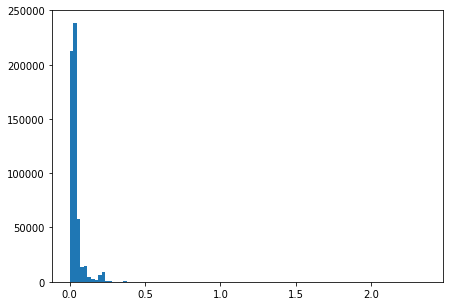

In [0]:
fig, p  = plt.subplots(1,1,figsize=(7,5))
my_hist = p.hist(radial_distance,bins=100)

Check out `p.hist?` to see what data is stored in `my_hist`.

Overall, this plot doesn't look great and isn't really informative for several reasons.

Make this plot great again by
- adding labels to the axes
- change the y axis scale to a logarithmic scale so that small values are not hidden by the very large values (hint: `p.set_yscale()`)
- plot a line for for 1000 pickup threshold (hint: `p.axhline()`)

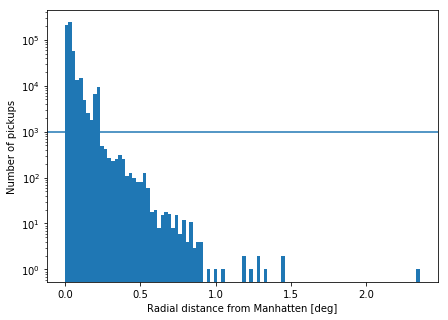

In [0]:
### ANSWER
fig, p  = plt.subplots(1,1,figsize=(7,5))
my_hist = p.hist(radial_distance,bins=100,log=True)
p.set_xlabel('Radial distance from Manhatten [deg]')
p.set_ylabel('Number of pickups')
p.set_yscale('log')
p.axhline(1000)

## Multiple axes plots and ticklabels

Now that you know within which radius you want to stay, you're interested in whether there are
particularly good or bad hours during the day for pickups and if there's a difference between days.

To illustrate this, we need additional helper arrays that provide the hour of the day and the day of the week).
This is where we need the `datetime` module to parse the `POSIXtimestamp` to a digestible format (assuming you're not able to convert the number of seconds since 01/01/1970 a specific day of the week by memory).

For the weekday we can use `datetime.fromtimestamp(time).isoweekday()` (with Monday being 1 and Sunday 7) and for the hour `datetime.fromtimestamp(time).hour` (from 0 to 23), e.g., for the first entry in the dataset

In [0]:
print('Day of the week: ', datetime.fromtimestamp(data['POSIXtimestamp'][0]).isoweekday())
print('Hour of the day: ', datetime.fromtimestamp(data['POSIXtimestamp'][0]).hour)

Day of the week:  2
Hour of the day:  0


Now create an `hours` and `weekdays` array. Again, if you spent more than a few minutes check out the spoiler

In [0]:
### ANSWER
# hours =
# weekdays = 

In [0]:
### SPOILER
hours = np.array([datetime.fromtimestamp(time).hour for time in data['POSIXtimestamp']])
weekdays = np.array([datetime.fromtimestamp(time).isoweekday() for time in data['POSIXtimestamp']])

Now plot a histogram of the pickups versus hour of the day _and_ a histogram of the pickups versus day in a _single_ figure.

Remember the arguments (especially the first two) of `plt.subplots()`.

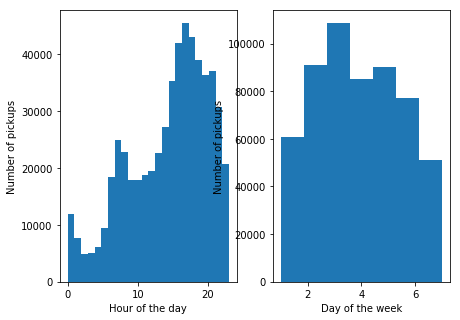

In [0]:
### ANSWER
fig, p  = plt.subplots(1,2,figsize=(7,5))
my_hist = p[0].hist(hours,bins=24)
my_hist = p[1].hist(weekdays,bins=7)

p[0].set_xlabel('Hour of the day')
p[1].set_xlabel('Day of the week')

for i in range(2):
    p[i].set_ylabel('Number of pickups')

Without any modifications the basic setups results in y axis label that overlap into a different subplot.

This is not ideal, but fortunately there are options to fix this.

Try `fig.tight_layout()` at the end in order to automatically adjust the overall figure so that all plots nicely sit next to each other -  it results, as the name of the function suggests, in a tight layout. This works for an arbitrary number of subplots and also for figures with multiple plots in rows and columns.

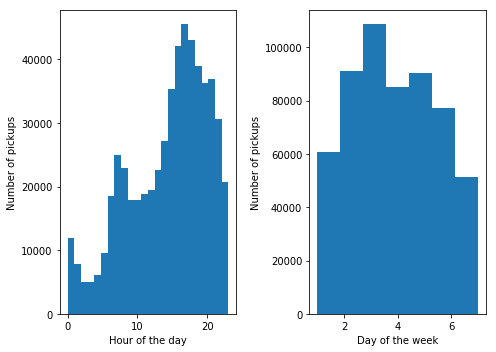

In [0]:
### ANSWER
fig, p  = plt.subplots(1,2,figsize=(7,5))
my_hist = p[0].hist(hours,bins=24)
my_hist = p[1].hist(weekdays,bins=7)

p[0].set_xlabel('Hour of the day')
p[1].set_xlabel('Day of the week')

for i in range(2):
    p[i].set_ylabel('Number of pickups')
fig.tight_layout()

In this case the information on the yaxis is identical for both subplots.
So why not use the same yaxis.
Check out the `share...` arguments of `plt.subplots()` in order to use a shared y axis for both axes.

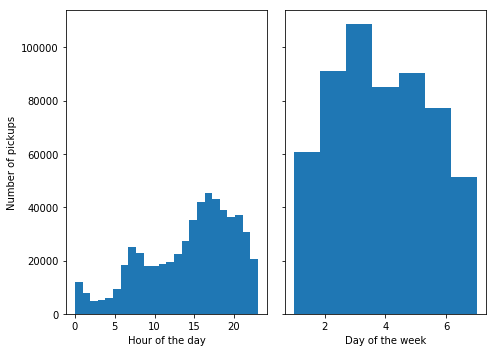

In [0]:
### ANSWER
fig, p  = plt.subplots(1,2,figsize=(7,5),sharey=True)
my_hist = p[0].hist(hours,bins=24)
my_hist = p[1].hist(weekdays,bins=7)

p[0].set_xlabel('Hour of the day')
p[1].set_xlabel('Day of the week')

p[0].set_ylabel('Number of pickups')

fig.tight_layout()

Lastly, an integer value of the day of the week is not easily parsed by humans [citation needed].
Let's change the ticks (remeber the figure anatomy above).

You can change the ticks of an axis by `ax.set_xticks()` and the ticklabels with (guess what) `ax.set_xticklabels()`.
The latter also takes a `rotation` argument, so that you put the text, e.g., at 45 degrees.

Hint: Create a list for the names of the weekdays as we'll reuse them later and it'll allow you to access them via indices.

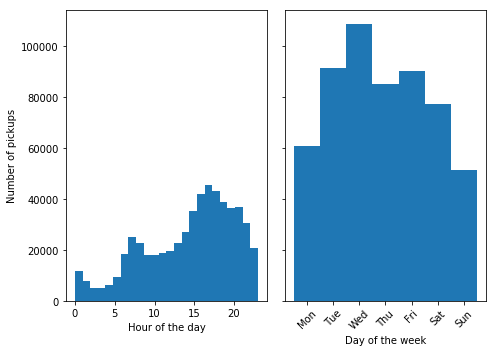

In [0]:
### ANSWER
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun']

fig, p  = plt.subplots(1,2,figsize=(7,5),sharey=True)
my_hist = p[0].hist(hours,bins=24)

p[0].set_xlabel('Hour of the day')
p[1].set_xlabel('Day of the week')

p[0].set_ylabel('Number of pickups')

my_hist = p[1].hist(weekdays,bins=7)
p[1].set_xticks(0.5*(my_hist[1][1:] +  my_hist[1][:-1]))
p[1].set_xticklabels(weekday_labels,rotation=45)

fig.tight_layout()

This looks like you want to offer rides on Wednesday evenings.

But is this actually true or are there variation throughout different days of the week versus hours? Let's find out!


# 2D histograms and plots

Similar to the `ax.hist()` function there exists a `ax.hist2d()` function, that plots a 2D histgram.

Plot a 2D histogram showing the weekday on the y axis and the hour of the day on the x axis.
Also, add axis labels (in readable format), and a colorbar (remember, what the colorbar in the very first example took as inputs and see how you can match that to the returned variables of `ax.hist2d()`.

Text(0, 0.5, 'Day of the week')

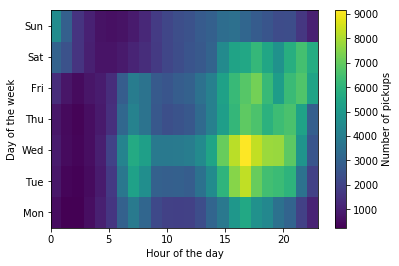

In [0]:
### ANSWER
fig, p = plt.subplots(1,1)
my_hist = p.hist2d(hours,weekdays,bins=(24,7))

p.set_yticks(0.5*(my_hist[2][1:] +  my_hist[2][:-1]))
p.set_yticklabels(weekday_labels)

cb = fig.colorbar(my_hist[3], ax=p)
cb.set_label("Number of pickups")

p.set_xlabel('Hour of the day')
p.set_ylabel('Day of the week')

This really looks like Wednesday evening is a good time of offer rides.

Before we go on, let's check out other ways to illustrate 2D data.
Two different approaches are commonly used: `ax.imshow()` and `ax.pcolormesh`.
The main difference stems from how the data is treated internally.

As a first step plot the histogram data (which is returned as first argument from the `ax.hist2d()` function above) in a single figure using `imshow` on one axis and `pcolormesh` on another axes.
What do you observe?


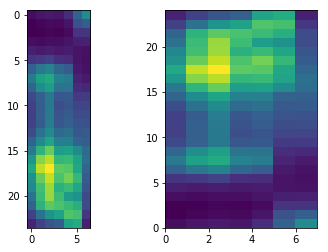

In [0]:
### ANSWER
fig, p = plt.subplots(1,2)
p[0].imshow(my_hist[0])
p[1].pcolormesh(my_hist[0])

Does any of the plots look like the original? Can you make both look like the original?

Hint: A transpose of the data might help and also `imshow` has an `origin` keyword.

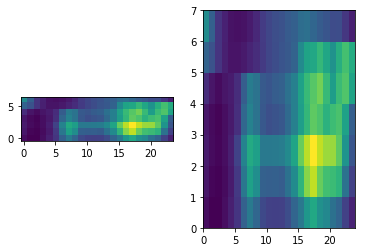

In [0]:
### ANSWER
fig, p = plt.subplots(1,2)
p[0].imshow(my_hist[0].T,origin='lower')
p[1].pcolormesh(my_hist[0].T)

On all these plots colors are difficult to compare quantitatively [citation needed], so let go back and compare the number of pickups versus the hour of the day for the different days of the week.

## From histograms to line plots

Plot histograms of the number of pickups versus the hour of the day for each day individually, but all one a single axes.
In addition, add a label to each histogram (see `label` keyword argument of `ax.hist()` so that you know 
which histgram corresponds to which day.
The labels are automatically used in a legend, that you can add to an axis with `ax.legend()`.
Feel free to also play with the `alpha` keyword of `ax.hist()` which controls the transparency of the histograms.
Do you find a way to compare the data in a visually appealing way?

Hint: Remember how you could use boolean masks for arrays (here, e.g., to distinguish between the weekdays in the hours array)

Text(0, 0.5, 'Number of pickups')

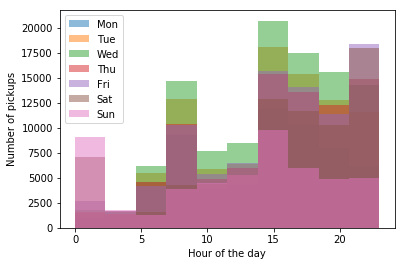

In [0]:
### ANSWER
fig, p = plt.subplots(1,1)
for i in range(1,8):
    p.hist(hours[weekdays == i],alpha=0.5,label=weekday_labels[i-1])
p.legend()
p.set_xlabel('Hour of the day')
p.set_ylabel('Number of pickups')

With these kind of instructions your instructors were _not_ able to make a visually appealing plot that clearly shows the data as the filled, overlapping histograms obstruct the information.

That's why we now resort to a line plot (which most of the tutorial around usually start with...).

A line plot can be added to an axis with `ax.plot()`. Check out (as usual) the help to get an overview of the arguments.

Given that we still need binned data, but don't use the embedded `ax.hist()` function, 
we'll (suggest to) use `np.histogram()` to create the binned data.
Check the following spoiler for some hint on how to use it in this context.

Now create a figure with a single axis where the number of pickups versus hour of the day are shown by one line per day.
Add a legend to distinguish between colors.

In [0]:
### SPOILER
# histogram for weekday i
# counts, bin_edges = np.histogram(hours[weekdays == i],bins=24)

Text(0, 0.5, 'Number of pickups')

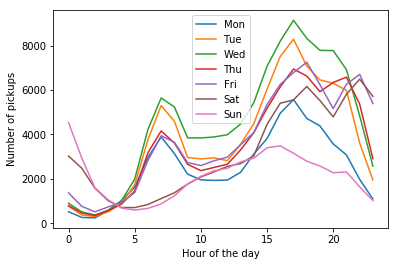

In [0]:
### ANSWER
fig, p = plt.subplots(1,1)
for i in range(1,8):
    hist, bin_edges = np.histogram(hours[weekdays == i],bins=24)
    X = 0.5*(bin_edges[1:] + bin_edges[:-1])
    p.plot(hist,label=weekday_labels[i-1])

p.legend()
p.set_xlabel('Hour of the day')
p.set_ylabel('Number of pickups')

All lines only differ in color, which is often problematic, e.g., for color-blind people or for figures 
printed in grayscale.

Fortunately, there's a variety of options avaiable to modify the linestyles via keyword argument, e.g.,
- the line style via `ls` (or as a first non keyword argument after the data argument) https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
- the line width via `lw`
- the marker style via `marker`, see https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html
- (you can also manually change the color via the `color` keyword)

Now make a plot where all lines are different.
In addition, the legend is kind of in the way.
Thus, move the legend outside of the plotting area by adjusting the `bbox_to_anchor` and `loc` argument of
`p.legend()`.


Note of warning: Only because it is possible, does not mean that it is always useful/helpful to make 
use of all options.

Text(0, 0.5, 'Number of pickups')

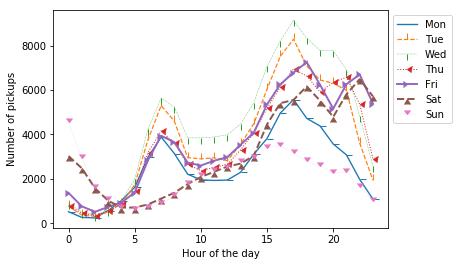

In [0]:
### ANSWER
linestyles = ['-', '--', '-.', ':']

fig, p = plt.subplots(1,1)
for i in range(1,8):
    hist, bin_edges = np.histogram(hours[weekdays == i],bins=24)
    X = 0.5*(bin_edges[1:] + bin_edges[:-1])
    p.plot(hist,label=weekday_labels[i-1],
           marker=i,
           ls=linestyles[(i-1)%4],
           lw=2.*np.random.rand())

p.legend(loc='upper left', bbox_to_anchor=(1,1))
p.set_xlabel('Hour of the day')
p.set_ylabel('Number of pickups')

## Errorplots
Now that we know there's variation between different days of the week, let's quantify that variation.

One way to address this is a plot with errorbars, which you can add to an axis with `ax.errorbar`.

As a preparatory step we need to process our data further.
Create a 2d histogram using `np.histogram2d()` so that you have all the lines form the plot above in a 2D array.
Then use `np.mean()` and `np.std()` to create an array of mean values and their standard deviation 
(Hint: the `axis` keyword argument will be very useful here.).

Again, if this takes more than a couple of minutes, check out the spoiler.

In [0]:
### ANSWER
# means = 
# stds = 

In [0]:
### SPOILER
counts, x_edges, y_edges = np.histogram2d(hours,weekdays,bins=(24,7))
means = np.mean(counts,axis=1)
stds = np.std(counts,axis=1)

Now plot the mean number of pickups with errorbars showing the standard deviation using `ax.errorbar()`.

Text(0, 0.5, 'Number of pickups')

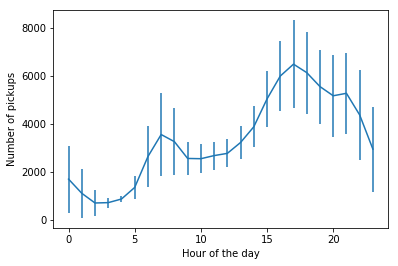

In [0]:
### ANSWER
fig, p = plt.subplots(1,1)

p.errorbar(np.arange(24),means,yerr=stds)

p.set_xlabel('Hour of the day')
p.set_ylabel('Number of pickups')

Finally, errors are not always symmetric.
Therefore modify your plot so that the errors now illustrate the minimum and maximum 
number of pickups for each hour of the day.

Hint: Check out what the layout of the `yerr` keyword argument should be in this case.

Text(0, 0.5, 'Number of pickups')

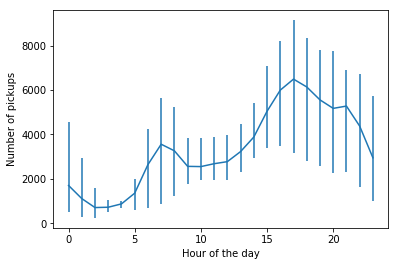

In [0]:
### ANSWER

maxs = np.max(counts,axis=1)
mins = np.min(counts,axis=1)

fig, p = plt.subplots(1,1)

p.errorbar(np.arange(24),means,yerr=(means-mins,maxs-means))

p.set_xlabel('Hour of the day')
p.set_ylabel('Number of pickups')


## Scatterplots

The final type of plot we'll cover in this tutorial is a scatterplot (`ax.scatter()`), which 
plots points at locations.
We already got plenty of location as latitude and logitudes, so let's plot these.

Try to recreate a plot similar to the one at the very top of the notebook using a scatterplot 
(in other words use the same axis limits, but use individual points rather than binned data to show the map).

Hint: The `alpha` keyword for transparency and the `s` keyword for the size of the scatter marker may turn out useful.

NameError: name 'data' is not defined

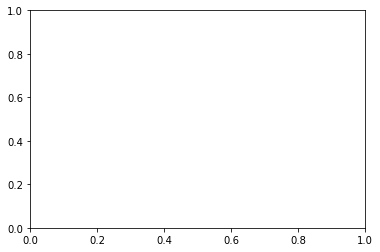

In [9]:
fig, p = plt.subplots(1,1)
p.scatter(data['Lon'],data['Lat'],s=0.1,alpha=0.3)
p.set_xlim(-74.26,-73.70)
p.set_ylim(40.55, 40.92)
p.set_xlabel("Longitude [degrees]")
p.set_ylabel("Latitude [degrees]")

## Saving plots

Last but not least you probably want to free the plots that you create from the notebook and save them elsewhere (or include them in your next paper presentation).

As with many `matplotlib` functions, the function to do this is explains itself by it name: `fig.savefig()`.

Important keyword arguments include (read this as a best practice guide)
- the filename suffix that you use to save the file automatically determines for format. For non-graphic plots, pdf is always a preferred choice over image file formats such as png or jpg, given that text and lines are embedded in the pdf (i.e., when you zoom on the figure the text remains smooth as it is not rendered to a particular resolution)
- `dpi` for setting the dots per inches of the figure. The higher, the more detailed. For print figures usually a number of at least 300 is required.
- `bbox_inches` set this to "`tight`" in order to automatically crop extra whitespace around the figure

Last action item: Pick your favorite plots (axes) from this notebook, put them in a single figure with multiple axes, potentially modify the plots, and finally save the figure as a 300 dpi pdf to your hard disk.

In [0]:
### ANSWER